<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#API's" data-toc-modified-id="API's-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>API's</a></span></li><li><span><a href="#Google-Trends" data-toc-modified-id="Google-Trends-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Google Trends</a></span><ul class="toc-item"><li><span><a href="#Interest-by-region" data-toc-modified-id="Interest-by-region-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Interest by region</a></span></li><li><span><a href="#Comparing-popularity-of-programming-languages-(interest-over-time)" data-toc-modified-id="Comparing-popularity-of-programming-languages-(interest-over-time)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Comparing popularity of programming languages (interest over time)</a></span></li><li><span><a href="#Daily-Search-Trends" data-toc-modified-id="Daily-Search-Trends-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Daily Search Trends</a></span></li><li><span><a href="#Impact-of-Pandemic-on-people's-interest" data-toc-modified-id="Impact-of-Pandemic-on-people's-interest-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Impact of Pandemic on people's interest</a></span></li></ul></li><li><span><a href="#Google-Places-API" data-toc-modified-id="Google-Places-API-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Google Places API</a></span></li><li><span><a href="#Next-course-(09.06.2020):-Introduction-to-Machine-Learning" data-toc-modified-id="Next-course-(09.06.2020):-Introduction-to-Machine-Learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Next course (09.06.2020): Introduction to Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Examples" data-toc-modified-id="Examples-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Examples</a></span></li><li><span><a href="#Clustering,-Recommender-System,-Classification,-Regression" data-toc-modified-id="Clustering,-Recommender-System,-Classification,-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Clustering, Recommender System, Classification, Regression</a></span></li></ul></li></ul></div>

In [1]:
# for the presentation it is better to use the full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## API's

Have you ever wondered how online flight search engines like **kayak** or expedia cater the best deals for you? How they manage to keep their data updated even if it means gathering data from hundreds of carriers?

The answer is with **API**s, acronym for Application Programming Interface.


With APIs we are able to retrieve data from remote websites. Sites like Google, Twitter, and Facebook all make certain data available to programmers through their Application Programming Interfaces — APIs. To use an API, you make a request to a remote web server, and retrieve the data you need.

<img src='img/api.jpeg' width=500>

But why use an API instead of a static data set you can download?  
APIs are useful in the following cases:
- The data is changing quickly (stock price data,..)
- You want a small piece of a much larger set of data (filter, requests, parameter)
- calculatings or preparations are done on the external system

In cases like the ones above, an API is the right solution. Here, we will be querying a simple API to retrieve data about **Google Trends and Google Places**. Using an API will save us time and effort over doing all the computation ourselves.

**API Requests in Python**
APIs are hosted on web servers. When you type www.google.com in your browser’s address bar, your computer is actually asking the www.google.com server for a webpage, which it then returns to your browser.
APIs work much the same way, except instead of your web browser asking for a webpage, your program asks for data. This data is usually returned in **JSON format**.

## Google Trends

https://trends.google.com/trends

**Google trends** is a website that analyzes and lists the popular search results on Google search based on various regions and languages.

Can I get this data into my Jupyter Notebook?  
Here you will learn how to get trending results (and many more) from Google trends website using Python. You don’t need to manually search and copy the trending results, the Python API called pytrends does the job for you. Before getting started, let us take a look at the official documentation of the pytrends API. (https://pypi.org/project/pytrends/)

In [2]:
import time
import pandas as pd

First of all we need to import (install) the required libraries.

In [3]:
# pip install pytrends
from pytrends.request import TrendReq

You must **connect to Google** first because, after all, we are requesting the Google trending topics from Google Trends. For this, we need to import the method called TrendReq from pytrends.request library. 

In [4]:
pytrend = TrendReq(hl='de',tz=360)
# https://sites.google.com/site/tomihasa/google-language-codes
# languages codes : hl=de ,hl='en-US'

### Interest by region

In [5]:
pytrend.build_payload( kw_list=['Corona'], geo='DE', timeframe='today 3-m' )
# 'today 3-m' , '2019-12-14 2020-02-25'

# Interest by Region
df = pytrend.interest_by_region(resolution='REGION')
df.sort_values('Corona',ascending= False)

,Corona
geoName,
Thüringen,100
Schleswig-Holstein,98
Hamburg,97
Niedersachsen,97
Baden-Württemberg,96
Bayern,95
Sachsen,95
Nordrhein-Westfalen,94
Mecklenburg-Vorpommern,92


The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term.

In [6]:
pytrend.related_queries()

{'Corona': {'top':                        query  value
  0         deutschland corona    100
  1             corona aktuell     54
  2               corona virus     46
  3              corona zahlen     44
  4                corona news     38
  5              bayern corona     35
  6                 corona nrw     31
  7               corona fälle     29
  8                 corona rki     24
  9               corona karte     24
  10             corona berlin     22
  11            italien corona     22
  12                corona usa     19
  13               corona live     19
  14         corona infizierte     18
  15           symptome corona     17
  16     corona in deutschland     17
  17               corona tote     16
  18            sachsen corona     16
  19      niedersachsen corona     16
  20         corona fallzahlen     16
  21      corona niedersachsen     16
  22  baden württemberg corona     15
  23             hessen corona     15
  24            hamburg corona   

### Comparing popularity of programming languages (interest over time)

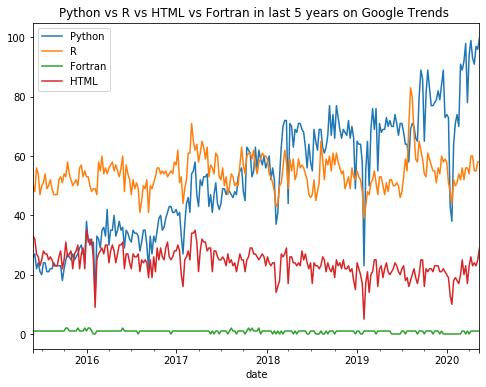

In [7]:
pytrend = TrendReq(hl='en-US', tz=360)
keywords = ['Python', 'R','Fortran','HTML']

# build the payload
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 5-y',
     geo='TW',
     gprop='')

# get the interest over time
data = pytrend.interest_over_time()

data= data.drop(labels=['isPartial'],axis='columns')

data.plot(title = 'Python vs R vs HTML vs Fortran in last 5 years on Google Trends ',figsize=(8,6));

In [8]:
CODES=pd.DataFrame( [pytrend.suggestions(keyword=i)[0] for i in keywords])
CODES

,mid,title,type
0,/m/05z1_,Python,Programming language
1,/m/0212jm,R,Programming language
2,/m/02_94,Fortran,Programming language
3,/m/03g20,HTML,Programming language


Spooky plot style? Later we will learn how to modify plot styles. 

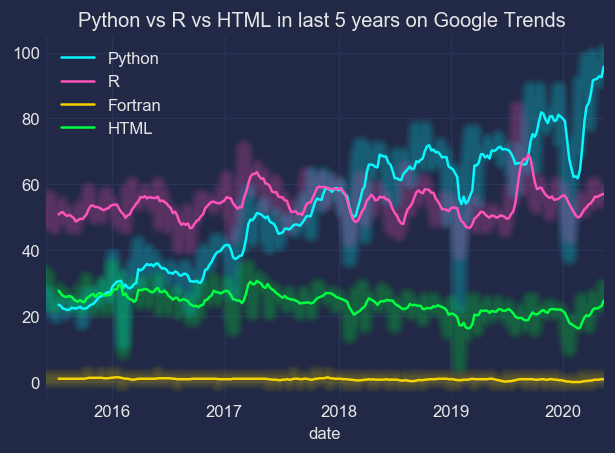

In [9]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.size'] = 10
mpl.rcParams['figure.dpi'] = 120.
plt.style.use("seaborn-dark")

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41', # matrix green
]
n_lines = 10
diff_linewidth = 1.05
alpha_value = 0.03
fig, ax = plt.subplots()
for n in range(1, n_lines+1):
    data.plot(
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)
data.rolling(7).mean().plot( ax=ax, color=colors,figsize=(6,4),title = 'Python vs R vs HTML in last 5 years on Google Trends ')
ax.grid(color='#2A3459')

### Daily Search Trends

Now let us get the top daily search trends worldwide. To do this we have to use the trending_searches() method. If you want to search worldwide just don’t pass any parameter.

In [10]:
# Get Google Hot Trends data
pytrend.trending_searches(pn='germany').head(10)

,0
0,John Tyler
1,IBM
2,Grimes
3,Drosten
4,Die Mumie 2017
5,Der gute Bulle
6,Bodo Ramelow
7,Snowpiercer
8,Almila Bagriacik
9,BGH-Urteil VW


### Impact of Pandemic on people's interest

In [11]:
pytrend = TrendReq(hl='en-US', tz=360)

KEYWORDS=['Zara','H&M','AMAZON','TESLA']
CODES=pd.DataFrame( [pytrend.suggestions(keyword=i)[0] for i in KEYWORDS])
CODES

,mid,title,type
0,/m/044_xs,Zara,Apparel company
1,/m/01d8pr,H&M,Clothing retail company
2,/m/0mgkg,Amazon.com,E-commerce company
3,/m/0j6n6s8,Tesla,Automobile make


In [12]:
EXACT_KEYWORDS=CODES['mid'].to_list()
DATE_INTERVAL='2017-01-01 2020-05-23'

COUNTRY=["US","DE",'IT'] #Use this link for iso country code

CATEGORY=0 # Use this link to select categories

SEARCH_TYPE='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)

In [13]:
Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]

dicti = {}
i = 1
for Country in COUNTRY:
    for keyword in Individual_EXACT_KEYWORD:
        time.sleep(1)
        pytrend.build_payload(kw_list=keyword, 
                              timeframe = DATE_INTERVAL, 
                              geo = Country,
                              cat=CATEGORY,
                              gprop=SEARCH_TYPE) 
        dicti[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(dicti, axis=1)
df_trends.columns = df_trends.columns.droplevel(0) #drop outside header
df_trends = df_trends.drop('isPartial', axis = 1) #drop "isPartial"
df_trends.reset_index(level=0,inplace=True) #reset_index
col = ['date']
for country in COUNTRY:
    for name in KEYWORDS:
        col.append(name+'-'+country)

df_trends.columns= col
df_trends.index=df_trends['date']
df_trends.drop('date',axis=1,inplace=True)

In [14]:
df_trends

,Zara-US,H&M-US,AMAZON-US,TESLA-US,Zara-DE,H&M-DE,AMAZON-DE,TESLA-DE,Zara-IT,H&M-IT,AMAZON-IT,TESLA-IT
date,,,,,,,,,,,,
2017-01-01,51,24,62,11,57,73,55,19,63,70,40,41
2017-01-08,50,23,59,11,49,66,50,17,44,58,37,42
2017-01-15,47,22,57,10,48,65,49,18,39,46,36,25
2017-01-22,47,23,55,10,49,63,50,21,37,44,36,26
2017-01-29,42,22,55,10,46,66,51,19,34,41,36,27
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-19,29,20,88,12,50,75,63,38,35,65,72,19
2020-04-26,33,22,89,15,50,71,61,42,38,69,71,20
2020-05-03,32,21,89,15,48,63,58,40,39,69,66,22


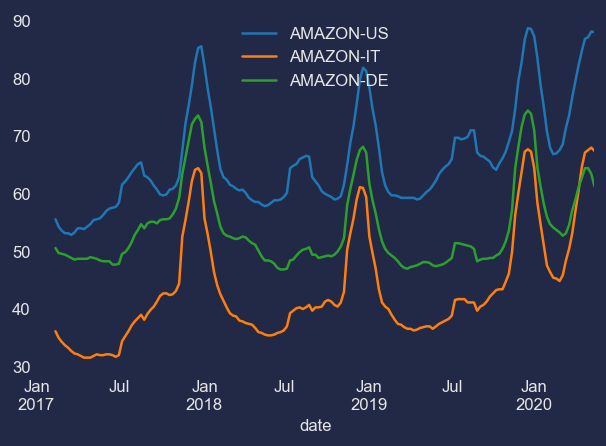

In [15]:
df_trends[['AMAZON-US','AMAZON-IT','AMAZON-DE']].rolling(7).mean().plot()

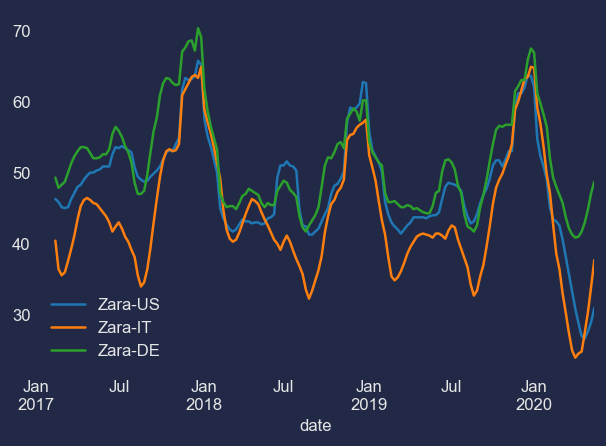

In [16]:
df_trends[['Zara-US','Zara-IT','Zara-DE']].rolling(7).mean().plot()

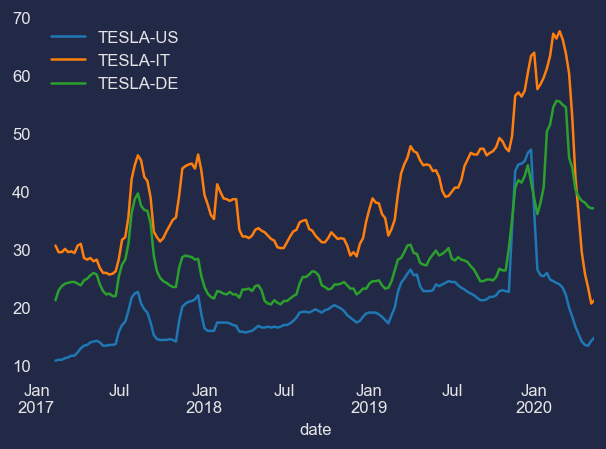

In [17]:
df_trends[['TESLA-US','TESLA-IT','TESLA-DE']].rolling(7).mean().plot()

Another Example: 
https://towardsdatascience.com/heartbreak-monday-blues-and-pytrends-f1a398591a79

'Popular times' feature of Google is not available within the Google Places API. However there is another way: https://github.com/m-wrzr/populartimes. 

**Before we continue with Google's Places API we will take a look at other Python modules.**

## Google Places API

How to get all the restaurants in a radius of 1km from my current locations (with the highest rating,...)? https://www.google.com/maps/place/Dresden/@51.0769658,13.6325012

 A detailed instruction can be found [here](https://python.gotrained.com/google-places-api-extracting-location-data-reviews/).

You should do:
- Create a new project
- enable APIs and services and get the API key!

https://console.developers.google.com/projectselector2/apis/
<img src ='img/google_api_1.png'>

Select the Google places API and activate it.
<img src ='img/google_api_2.png'>

Here is the documentary:
https://developers.google.com/places/web-service/intro

Let us import a csv file and see what it contains:

In [18]:
dresden_nb = pd.read_csv('data/dresden_nb.csv',index_col=0)

In [19]:
dresden_nb

,Post_code,latitude,longitude
Neighborhood,,,
Albertstadt,01099,51.083220,13.768608
Altfranken,01156,51.034636,13.643747
Äußere Neustadt,"01097, 01099",51.067186,13.752811
Blasewitz/Neugruna,"01277, 01279, 01307, 01309",51.044033,13.811145
Briesnitz,"01157, 01169",51.068931,13.664462
...,...,...,...
Tolkewitz/Seidnitz-Nord,"01277, 01279",51.034092,13.817731
Trachau,"01129, 01139",51.100235,13.702966
Weißig,01328,51.060894,13.897644


In [20]:
import folium
lat_dd,long_dd = 51.050314, 13.724839

map_Dresden = folium.Map(location=[lat_dd, long_dd], zoom_start=12)
# marker_cluster = MarkerCluster().add_to(m)

# add markers to map
for lat, lng, city_part in zip(dresden_nb['latitude'], dresden_nb['longitude'], dresden_nb.index):
    label = '{}'.format(city_part)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
#         popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False,popup=label).add_to(map_Dresden)
    
map_Dresden

This function is needed to access Google Places API

In [1]:
import json
import requests
import time
from api_keys import api_key_2

# here is my private api_key, please do use your own
API_KEY = api_key_2


NameError: name 'api_key_2' is not defined

Let us try to get some information out of Google's Places API

In [22]:
lat_dd,long_dd = 51.050314, 13.724839
location = str(lat_dd) + "," + str(long_dd)

endpoint_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

params = {'location': location,
            'radius': '300',
            'types': 'restaurant',
            'key': API_KEY }

res = requests.get(endpoint_url,  params)

results =  json.loads(res.content)
results

{'html_attributions': [],
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 51.0486149, 'lng': 13.7224103},
    'viewport': {'northeast': {'lat': 51.0502507802915,
      'lng': 13.7236592302915},
     'southwest': {'lat': 51.0475528197085, 'lng': 13.7209612697085}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/restaurant-71.png',
   'id': '33fe4c93514b5746834e5ab4b52d47347143889b',
   'name': 'Restaurant Lampenfieber',
   'opening_hours': {'open_now': True},
   'photos': [{'height': 960,
     'html_attributions': ['<a href="https://maps.google.com/maps/contrib/105752422972608002795">Restaurant Lampenfieber</a>'],
     'photo_reference': 'CmRaAAAAi602Q8zIa8c8ZpQb1IMFzploKS6KTNeEusxv7EKVRbNTTSDmCfHwKibtre3Obt8TvzXuhL_rL9V6k5Ch5XUh9pyV-uWA4t9LvskLGa4Q9hooW2ELrhcyysd2yv1gWmUqEhBylcbaEyc6Aqr-F8iLXy2JGhTLkNF7mRdff4l_OlomrqIdn55uKA',
     'width': 651}],
   'place_id': 'ChIJTZqWpHzPCUcR6fVYc55KYjU',
   'plus_code': {'compound_code': '2PXC+CX

This is a bit messy. Let's write a function that calls the Google Places API and writes the results in a pandas DataFrame.

In [23]:
def get_places(lat,long, types, pages , radius):
    places = []
    location = str(lat) + "," + str(long)
    endpoint_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    params = {
            'location': location,
            'radius': radius,
            'types': types,
            'key': API_KEY
        }

    res = requests.get(endpoint_url, params = params)
    results =  json.loads(res.content)
    places = places + results['results']
    time.sleep(2.2)
    while "next_page_token" in results:
        params['pagetoken'] = results['next_page_token'],
        res = requests.get(endpoint_url, params = params)
        results = json.loads(res.content)
        places = places + results['results']
        time.sleep(2.2)
    return places

 Each search can return maximum 60 results and there will be 20 results per page. So you will need to paginate through the results if there is more that 20 results in your search. If there is more pages the API will return  next_page_token  with the results and you have to submit this value to the API with the same search parameters to get the rest of the results.  
Note: There is a delay until the  next_page_token is issued and validated. So you need to put a small sleep time like 2 seconds between each request. Otherwise, you will get an  INVALID_REQUEST status.

The next function parse the json file to a DataFrame:

In [24]:
def parse_place_to_list(place, type_name,hood):
    return [
        hood,
        place['name'],
        place['place_id'],
        place['geometry']['location']['lat'],
        place['geometry']['location']['lng'],
        type_name,
#         place['rating'],
#         place['user_ratings_total'],
#         place['icon']
    ]

Let us try it out:

In [25]:
alt_neu_stadt = dresden_nb.loc[['Innere Altstadt','Innere Neustadt','Äußere Neustadt','Striesen-West']]
alt_neu_stadt

,Post_code,latitude,longitude
Neighborhood,,,
Innere Altstadt,"01067, 01069",51.051112,13.739014
Innere Neustadt,"01097, 01099",51.060078,13.744628
Äußere Neustadt,"01097, 01099",51.067186,13.752811
Striesen-West,"01307, 01309",51.048649,13.782633


In [26]:
lat_dd,long_dd = 51.050314, 13.724839
map_Dresden = folium.Map(location=[lat_dd, long_dd], zoom_start=13)

# add markers to map
for lat, lng, city_part in zip(alt_neu_stadt['latitude'], alt_neu_stadt['longitude'], alt_neu_stadt.index):
    label = '{}'.format(city_part)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker([lat, lng],
        radius=5, fill=True,fill_opacity=0.7).add_to(map_Dresden)
    
    folium.Circle([lat, lng],
                    radius=490,fill=True,fill_opacity=0.3,popup=label
                   ).add_to(map_Dresden)
    
map_Dresden

What about all the restaurants in this four neighborhoods?

In [27]:
data = []
radius = 490
pages = 3
place_type = 'restaurant'

# get the restaurants
names = alt_neu_stadt.index

for name in names:
    print ('Getting places for ',name)
    lat, lng = alt_neu_stadt.loc[name]['latitude'] ,alt_neu_stadt.loc[name]['longitude']

    result = get_places(lat,lng,place_type, pages,radius)

    # this converts the json data to a list
    result_parsed = list(map(lambda x: parse_place_to_list(x, place_type, name ), result))
    data = data + result_parsed


dd_ggl = pd.DataFrame(data, columns=['Neighborhood','Venue', 'place_id', 'latitude', 'longitude', 'place_type'])
dd_ggl

Getting places for  Innere Altstadt
Getting places for  Innere Neustadt
Getting places for  Äußere Neustadt
Getting places for  Striesen-West


,Neighborhood,Venue,place_id,latitude,longitude,place_type
0,Innere Altstadt,Sophienkeller im Taschenbergpalais,ChIJe-d6MmbPCUcRrqzjBLVTbKk,51.051905,13.734948,restaurant
1,Innere Altstadt,Coselpalais - Restaurant & Grand Café,ChIJQXEkyELPCUcRiFqB-XclnmI,51.052202,13.742471,restaurant
2,Innere Altstadt,Augustiner an der Frauenkirche,ChIJQXEkyELPCUcRux2IlVhZoJI,51.051493,13.742133,restaurant
3,Innere Altstadt,Felix im Lebendigen Haus,ChIJ7U-7ymfPCUcRy_OtUvqSmrs,51.051614,13.734670,restaurant
4,Innere Altstadt,Shamrock Irish Bar & Restaurant,ChIJe5JWNGbPCUcRgsN2caFryiQ,51.050786,13.736572,restaurant
...,...,...,...,...,...,...
169,Striesen-West,Mensologie,ChIJ8eCoT7fICUcR4NVyY7KVcgc,51.052692,13.784333,restaurant
170,Striesen-West,Unser Bäcker - Bäckerei und Konditorei GmbH,ChIJT2gtfq_ICUcRZCEB1yyaFG4,51.044460,13.781114,restaurant
171,Striesen-West,NEWROZ Dürüm-Kebap-Haus,ChIJ8ZgqBrDICUcRnfCgbnXqCbc,51.047698,13.782730,restaurant
172,Striesen-West,Restaurant Daniel,ChIJi9OXLWvPCUcROM7TFidJ1JI,51.051014,13.777486,restaurant


The place_id is needed if you want to have further information about the place (ratings, address, pictures,...).

In [28]:
dd_ggl['Neighborhood'].value_counts()

Innere Altstadt    60
Äußere Neustadt    60
Innere Neustadt    47
Striesen-West       7
Name: Neighborhood, dtype: int64

In [29]:
from folium.plugins import MarkerCluster

map_Dresden = folium.Map(location=[lat_dd, long_dd], zoom_start=13)

incidents = MarkerCluster().add_to(map_Dresden)
# add markers to map
for lat, lng, name in zip(dd_ggl['latitude'], dd_ggl['longitude'], dd_ggl['Venue']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    
    
    folium.Marker([lat, lng],icon=None,popup=label).add_to(incidents)

map_Dresden

Let us look for a bit more information about the city and explore it.

In [30]:
places_types = ['art_gallery','airport','bank','bar','beauty_salon','book_store','bakery','bus_station',
            'cafe','church','doctor', 'dentist', 'gym','hair_care','hospital','pharmacy','pet_store',
            'night_club','movie_theater','school','shopping_mall','supermarket','city_hall',
            'clothing_store','electronics_store','gas_station','meal_delivery', 'meal_takeaway',
            'museum','park','restaurant','train_station','car_dealer', 'car_rental','casino',
               'car_repair', 'car_wash','city_hall','drugstore','jewelry_store','library','parking','stadium','tourist_attraction']
places_types = set(places_types) # deletes repated entries

data = []
radius = 490  # radius of the search
pages = 3   # per page 20 entries , max 3 pages or 60 entries per query 

# for name in dresden_nb.index:
#     print("Getting into "  + name)
#     for place_type in places_types:
#         lat, lng = dresden_nb.loc[name]['latitude'] ,dresden_nb.loc[name]['longitude']
#         result = get_places(lat,lng,place_type, pages,radius)
        
#         result_parsed = list(map(lambda x: parse_place_to_list(x, place_type, name ), result))
#         data += result_parsed
# dd_ggl = pd.DataFrame(data, columns=['Neighborhood','Venue', 'place_id', 'latitude', 'longitude', 'place_type'])
# dd_ggl.to_csv('data/dresden_venues_google_p3_r490.csv')

In [31]:
# as the above takes quite a while we will load the result
dd_ggl = pd.read_csv('data/dresden_venues_google_p3_r490.csv')

In [32]:
dd_ggl[['Neighborhood','place_type']].groupby('place_type').describe().head(10)

Neighborhood                                 
                    count unique                  top freq
place_type                                                
airport                 3      2  Hellerau/Wilschdorf    2
art_gallery            20      7      Innere Altstadt    6
bakery                171     41      Innere Altstadt   22
bank                  110     27      Innere Neustadt   22
bar                   115     25      Äußere Neustadt   40
beauty_salon           86     33          Löbtau-Nord   11
book_store             30     18      Innere Altstadt    4
bus_station             7      5          Löbtau-Nord    2
cafe                  183     36      Innere Altstadt   48
car_dealer             68     31           Löbtau-Süd    9

In [33]:
dd_ggl[['Neighborhood','place_type']].groupby('place_type').count()

,Neighborhood
place_type,
airport,3
art_gallery,20
bakery,171
bank,110
bar,115
beauty_salon,86
book_store,30
bus_station,7
cafe,183


Place details and further google API calls (https://developers.google.com/places/web-service/details).

In [34]:
def get_place_details(place_id, fields):
    endpoint_url = "https://maps.googleapis.com/maps/api/place/details/json"
    params = {
            'placeid': place_id,
            'fields': ",".join(fields),
            'key': API_KEY
        }
    res = requests.get(endpoint_url, params = params)
    place_details =  json.loads(res.content)
    return place_details

Now  places variable contains our search results. Every place has a  place_id and we will use the place identifier to retrieve more details about it.

Let’s define the fields which we want to retrieve.

fields = ['name', 'formatted_address', 'international_phone_number', 'website', 'rating', 'review']

And finally retrieve the details.

Show all bakeries in the search:

In [35]:
bakery = dd_ggl[dd_ggl['place_type']=='bakery']
bakery

,Unnamed: 0,Neighborhood,Venue,place_id,latitude,longitude,place_type
267,267,Äußere Neustadt,Bäckerei Otte Backland,ChIJiRXB_OmQcUERI5WsshmO5Gc,51.067254,13.754189,bakery
268,268,Äußere Neustadt,Richter Bäckerei,ChIJL7xkWTzPCUcRN4JKIpSLZsg,51.067719,13.754841,bakery
269,269,Äußere Neustadt,Bäckerei Konditorei Graf,ChIJE1CAKOqQcUERieQyuCgGQJw,51.065756,13.750356,bakery
270,270,Äußere Neustadt,Fiete Behnersens V-Cake,ChIJS8Wj2D7PCUcR2zbzGlgSO2M,51.063973,13.752530,bakery
271,271,Äußere Neustadt,BackWerk,ChIJ_yR4XT3PCUcR_Ab6O4NrQ7Q,51.070877,13.750537,bakery
...,...,...,...,...,...,...,...
4251,4251,Tolkewitz/Seidnitz-Nord,Bäckerei Konditorei Siemank,ChIJnartsH_ICUcRYeFsFjdyCHI,51.033291,13.823118,bakery
4252,4252,Tolkewitz/Seidnitz-Nord,Bäckerei Siemank OHG,ChIJp5wKjnKQcUERJlLWhWXJ3xE,51.033590,13.823135,bakery
4339,4339,Wilsdruffer Vorstadt/Seevorstadt-West,Bakeries Laube,ChIJbZqrnnzPCUcRK7mVvl4eEEg,51.048164,13.721536,bakery
4340,4340,Wilsdruffer Vorstadt/Seevorstadt-West,Dresdner Backhaus GmbH,ChIJk0912GTPCUcROVJnwk6dWXw,51.050547,13.725218,bakery


In [36]:
from folium.plugins import MarkerCluster

map_Dresden = folium.Map(location=[lat_dd, long_dd], zoom_start=13)

incidents = MarkerCluster().add_to(map_Dresden)
# add markers to map
for lat, lng, name in zip(bakery['latitude'], bakery['longitude'], bakery['Venue']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    
    
    folium.Marker([lat, lng],icon=None,popup=label).add_to(incidents)

map_Dresden

**Let's explore the city a bit more. Which Neighborhoods are similiar?**  
**Clustering** **ML**

**Show example of opening an Italien restaurant in Berlin.**

## Next course (09.06.2020): Introduction to Machine Learning
### Examples
### Clustering, Recommender System, Classification, Regression